## Data Analysis
### This is the first step of Data Scince Life Cycle
### Performing EDA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
dataset=pd.read_csv('train.csv')

In [3]:
pd.pandas.set_option('display.max_columns',None)

In [4]:
dataset.shape

(1460, 81)

In [5]:
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


#### Here we are considering the Large Data set of training dataset of House Data. In which
#### Dependent feature: SalePrice
In this EDA we will do Analyse:
#### 1)Categorical Features(Object data-'O')
#### 2)Numerical Features(Not Object-'O'):
    In Numerical Features We have:
     ->Descrete Features(Here we are considering the count of Unique records <=25)
     ->Continuous Features(The Count of Records>25)
Apart from These two We are not considering the features in Categorical & Numerical which contains *Datatime*(Year,Or date related features)'.'Because the time is temporary data & Varies.So we should Consider Time related features seperately.
#### 3)Analyzing of the Missing Values
#### 4)Cardinality of Categorical Variables(Objects)
#### 5)Outliers
#### 6)Finding The Relationship between Each Independent Feature vs Dependent Feature('SalePrice')

## Missing Values

In [6]:
features_null=[i for i in dataset.columns if dataset[i].isnull().sum()>1]
for x in features_null:
    print(x,np.round(dataset[x].isnull().mean(),4))

LotFrontage 0.1774
Alley 0.9377
MasVnrType 0.0055
MasVnrArea 0.0055
BsmtQual 0.0253
BsmtCond 0.0253
BsmtExposure 0.026
BsmtFinType1 0.0253
BsmtFinType2 0.026
FireplaceQu 0.4726
GarageType 0.0555
GarageYrBlt 0.0555
GarageFinish 0.0555
GarageQual 0.0555
GarageCond 0.0555
PoolQC 0.9952
Fence 0.8075
MiscFeature 0.963


### Relarionship between These Missing Values & o/p

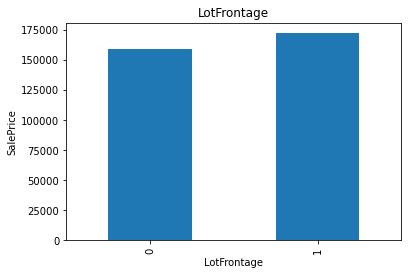

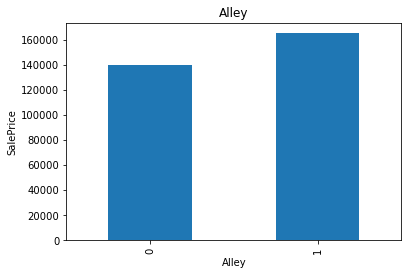

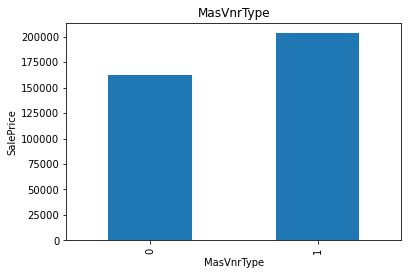

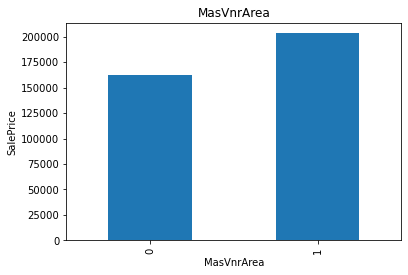

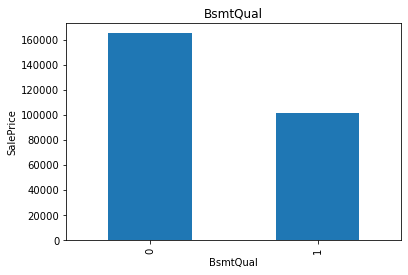

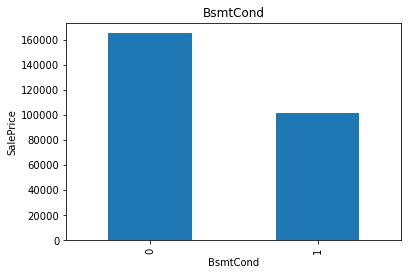

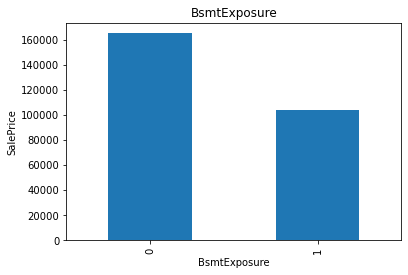

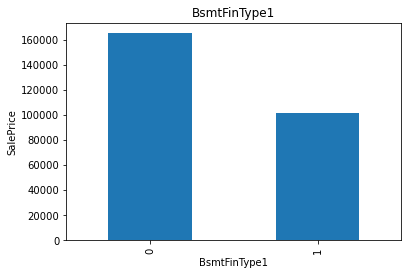

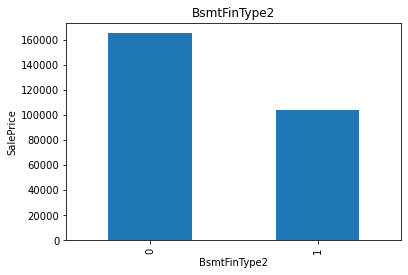

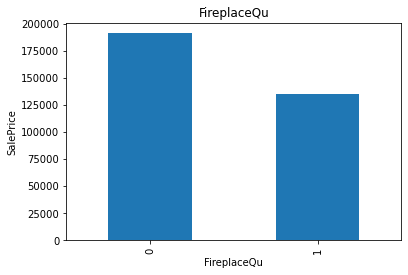

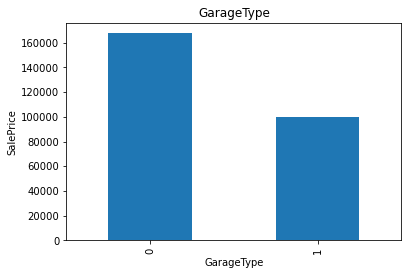

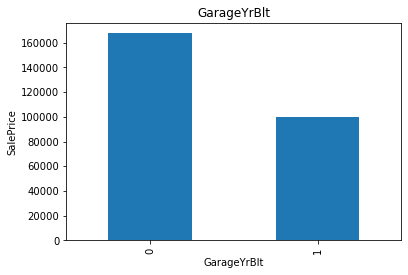

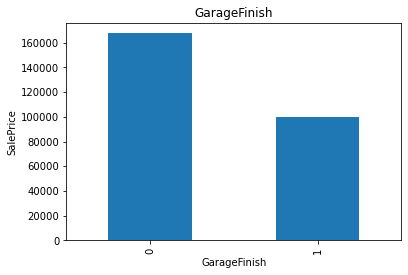

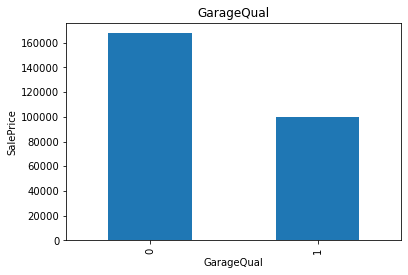

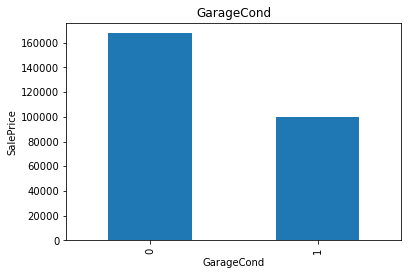

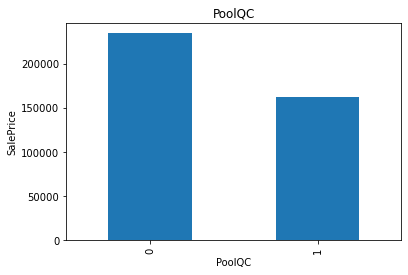

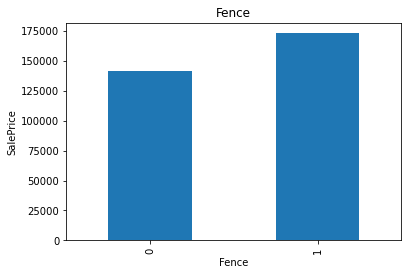

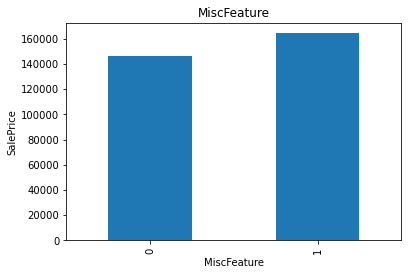

In [7]:
for i in features_null:
    data=dataset.copy()
    data[i]=np.where(data[i].isnull(),1,0)
    data.groupby(i)['SalePrice'].median().plot.bar()
    plt.title(i)
    plt.ylabel('SalePrice')
    plt.show()

The 'Id' Column is not reqired

In [8]:
print(len(dataset.Id))

1460


We have can Modify this Feature in Feature Engineering

## 1)Numerical variables

### numerical_variables=[i for i in dataset.columns if dataset[i].dtype!='O']
print(len(numerical_variables))
dataset[numerical_variables].head()

There are 38 Numerical Features in which 4 features which are related to datatime i.e.,
[YearBuilt,YearRemodAdd,GarageYrBlt,GarageYrBlt]

In [10]:
year_feature=[i for i in numerical_variables if 'Year' in i or 'Yr' in i]

In [11]:
year_feature

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

## Relationship b/w Years & SalePrice

Text(0, 0.5, 'SalePrice')

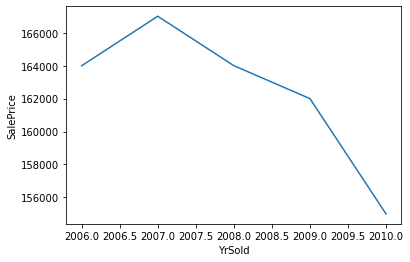

In [12]:
data.groupby('YrSold')['SalePrice'].median().plot()
plt.ylabel('SalePrice')

In the Above Graph the SalePrice is Decreasing while sold of Years Increasing..
Actually this is wrong in reality. So We have to perform something over *YrSold*

Compare all the features of year_feature with YrSold so that we will get the difference of the YrSold and respective feature

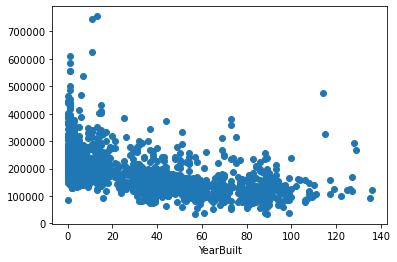

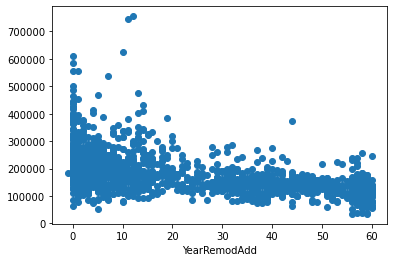

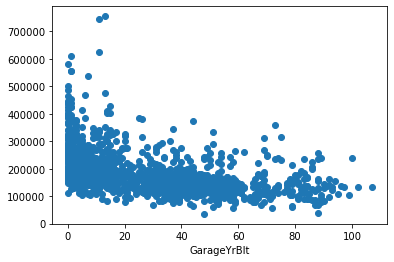

In [13]:
for i in year_feature:
    if i!='YrSold':
        data=dataset.copy()
        data[i]=data['YrSold']-data[i]
        plt.scatter(data[i],data['SalePrice'])
        plt.xlabel(i)
        plt.show()

## 2)Discrete features in Numerical Data

In [14]:
discrete_features=[i for i in numerical_variables if len(dataset[i].unique())<25 and i not in year_feature+['Id']]

In [15]:
print(len(discrete_features))

17


### Relationship between Discrete features to output(SalePrice)

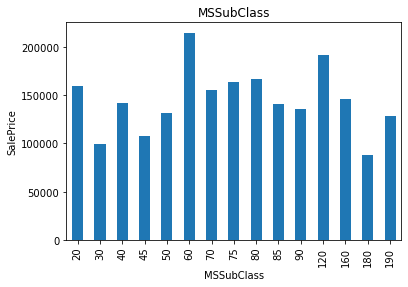

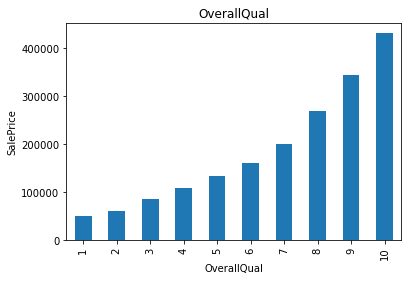

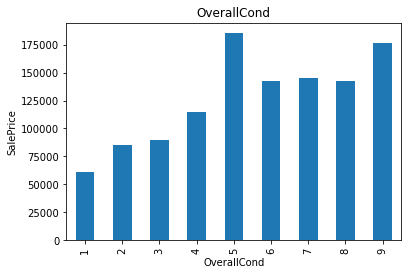

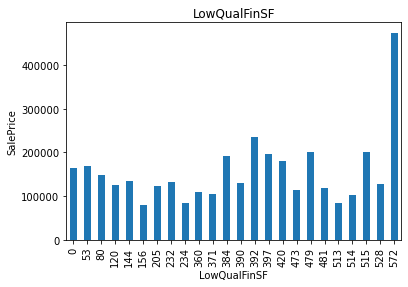

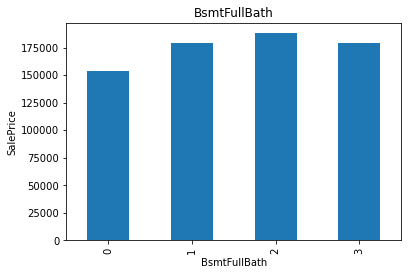

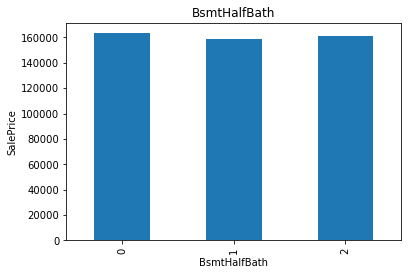

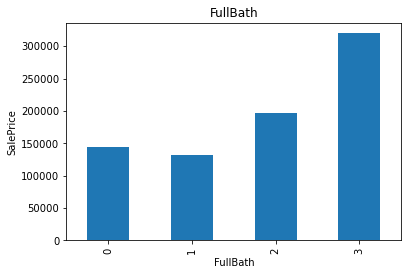

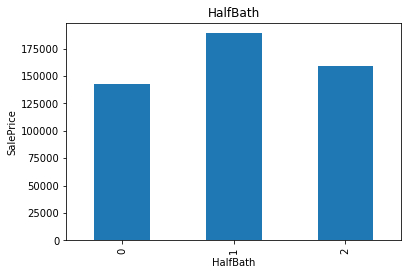

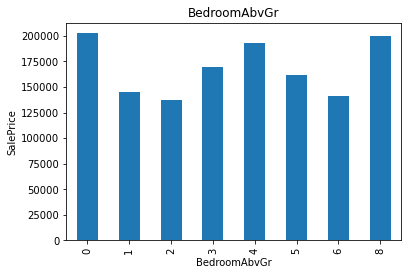

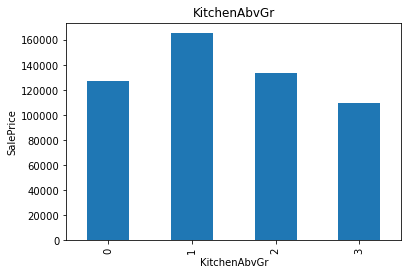

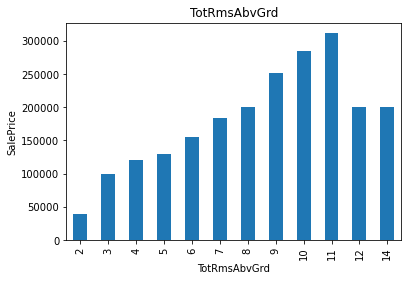

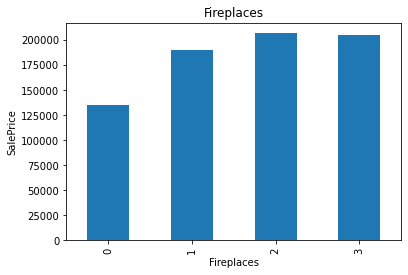

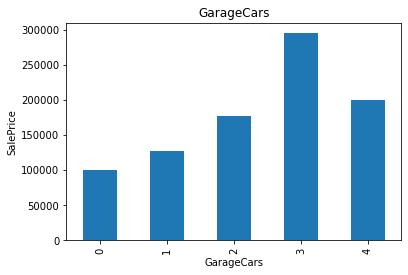

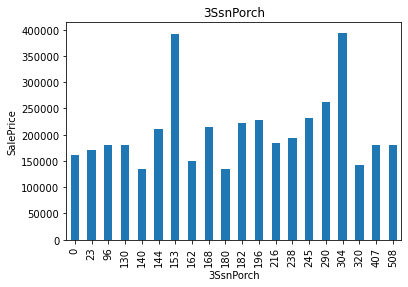

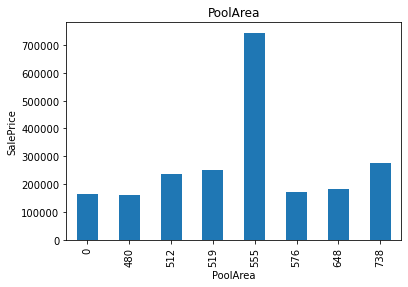

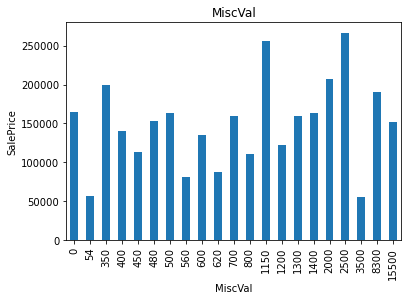

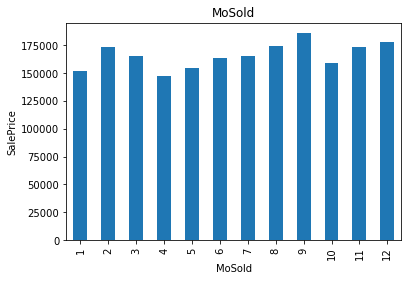

In [16]:
for feature in discrete_features:
    data=dataset.copy()
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.title(feature)
    plt.ylabel('SalePrice')
    plt.show()

Here There is no Monotonic Relationship with all Independent Features.
So, We can Modify them in Feature Engineering

## 3)Continuous Features in Numerical Data

In [17]:
continuous_features=[i for i in numerical_variables if len(dataset[i].unique())>=25 and i not in year_feature+['Id']]
print(len(continuous_features))

16


### Relationship between Continuous features and Numerical Data

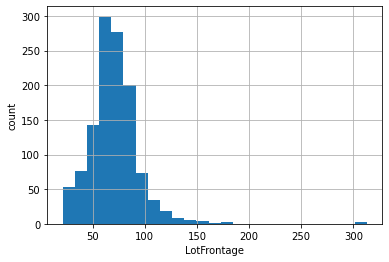

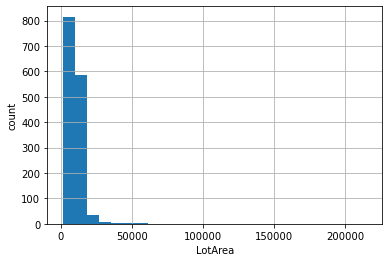

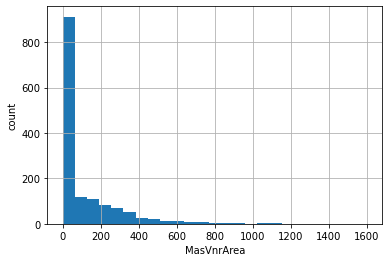

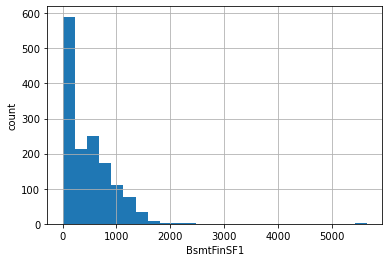

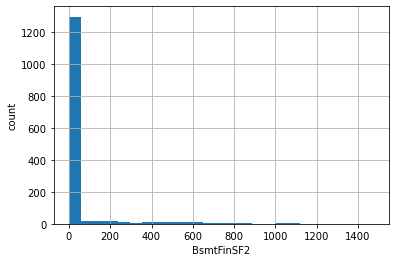

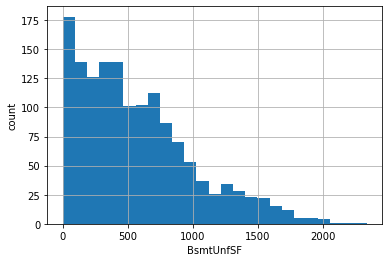

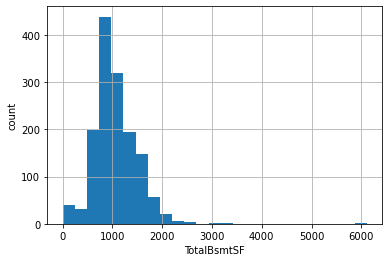

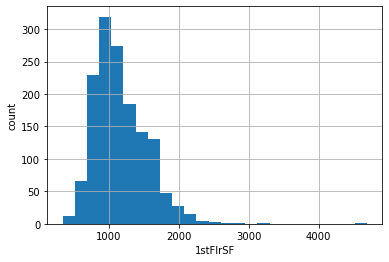

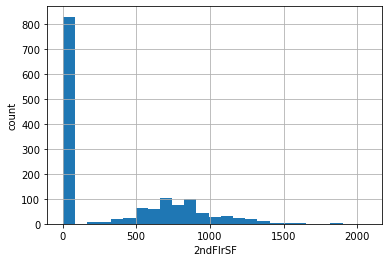

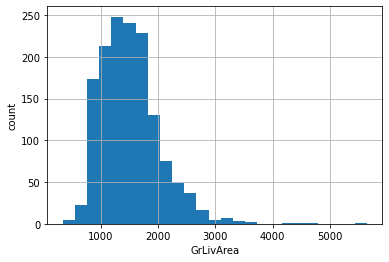

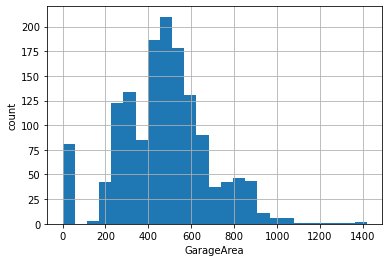

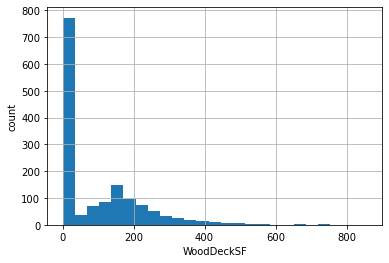

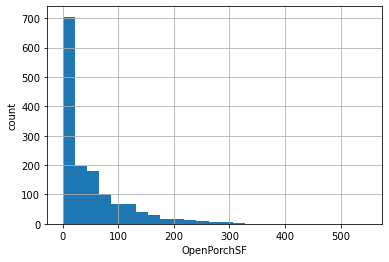

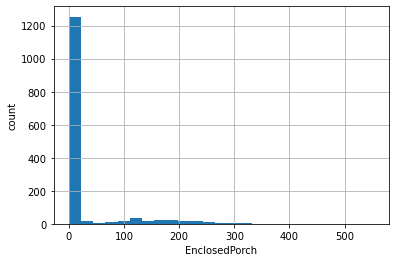

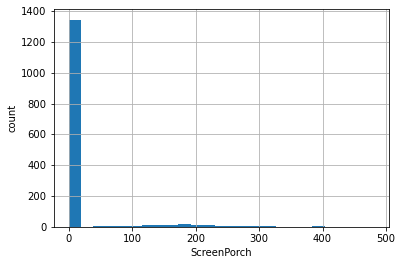

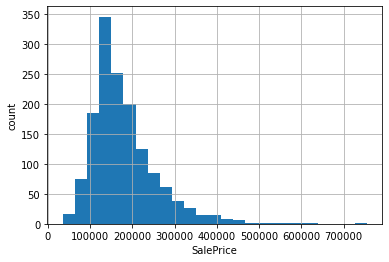

In [18]:
for i in continuous_features:
    data=dataset.copy()
    data[i].hist(bins=25)
    plt.xlabel(i)
    plt.ylabel('count')
    plt.show()

## Logarithmic Transformation

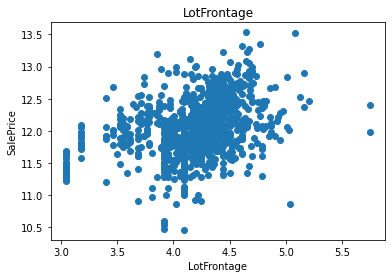

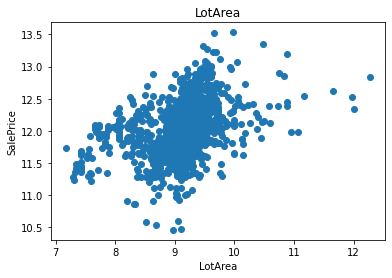

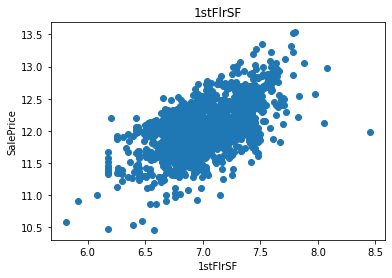

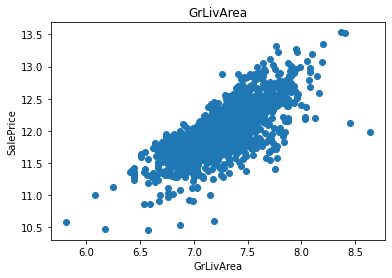

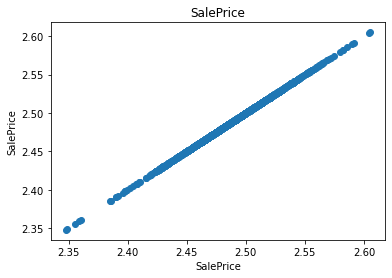

In [19]:
for i in continuous_features:
    data=dataset.copy()
    if 0 in data[i].unique():
        pass
    else:
        data[i]=np.log(data[i])
        data['SalePrice']=np.log(data['SalePrice'])
        plt.scatter(data[i],data['SalePrice'])
        plt.xlabel(i)
        plt.ylabel("SalePrice")
        plt.title(i)
        plt.show()

The log transformation is often used to reduce skewness of a measurement variable.. When record '0' is not present in the features of numbers then we have to apply the logarithmic transformation so that the large values which are rapidly increasing will become lower..
If '0' is not there in the features then we can consider that feature as Highly Skewed.

## Finding Outliers in The Features which do not contains '0'

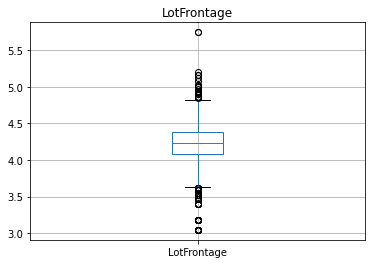

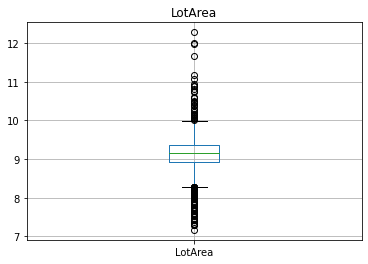

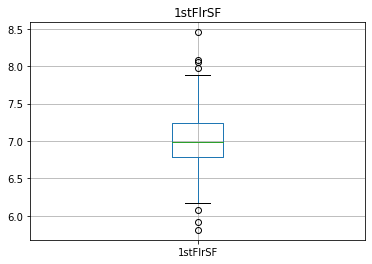

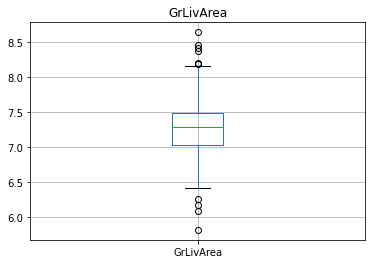

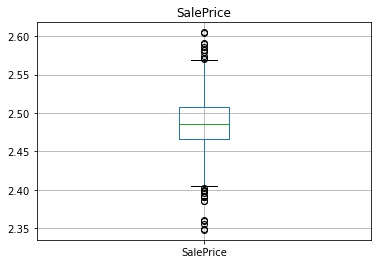

In [20]:
for i in continuous_features:
    data=dataset.copy()
    if 0 in data[i].unique():
        pass
    else:
        data[i]=np.log(data[i])
        data['SalePrice']=np.log(data['SalePrice'])
        data.boxplot(column=i)
        plt.title(i)
        plt.show()

In the above Graph's we can see the outliers in that.We can modify these features in feature Engineering

## 4)Categorical Variables

In [21]:
categorical_variables=[i for i in dataset.columns if dataset[i].dtypes=='O']
len(categorical_variables)
dataset[categorical_variables].head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [22]:
len(categorical_variables)

43

In [23]:
for i in categorical_variables:
    print(i,len(dataset[i].unique()))

MSZoning 5
Street 2
Alley 3
LotShape 4
LandContour 4
Utilities 2
LotConfig 5
LandSlope 3
Neighborhood 25
Condition1 9
Condition2 8
BldgType 5
HouseStyle 8
RoofStyle 6
RoofMatl 8
Exterior1st 15
Exterior2nd 16
MasVnrType 5
ExterQual 4
ExterCond 5
Foundation 6
BsmtQual 5
BsmtCond 5
BsmtExposure 5
BsmtFinType1 7
BsmtFinType2 7
Heating 6
HeatingQC 5
CentralAir 2
Electrical 6
KitchenQual 4
Functional 7
FireplaceQu 6
GarageType 7
GarageFinish 4
GarageQual 6
GarageCond 6
PavedDrive 3
PoolQC 4
Fence 5
MiscFeature 5
SaleType 9
SaleCondition 6


### Finding the Relationship between Categorical Variables and SalePrice

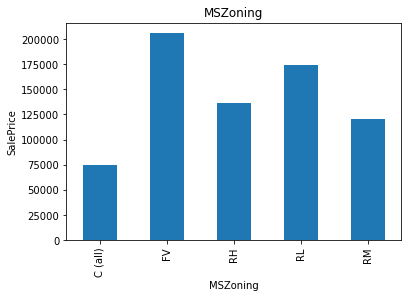

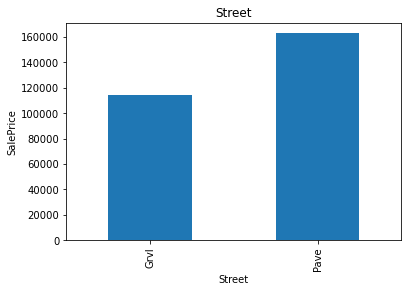

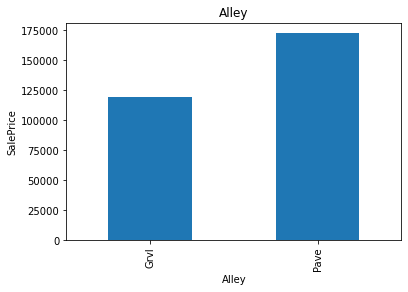

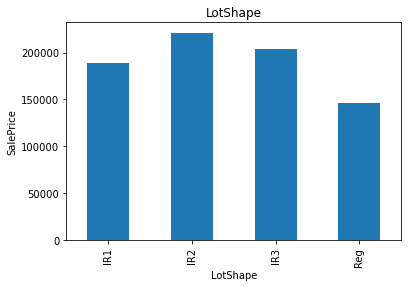

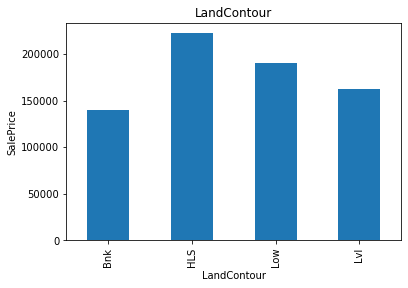

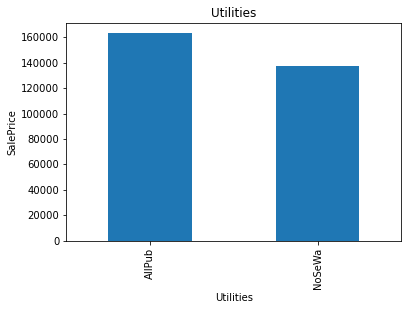

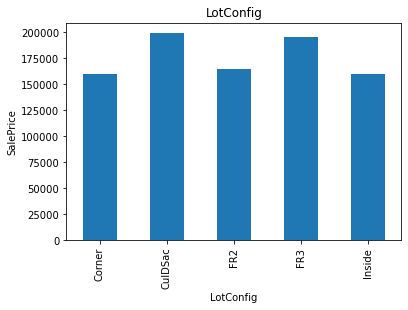

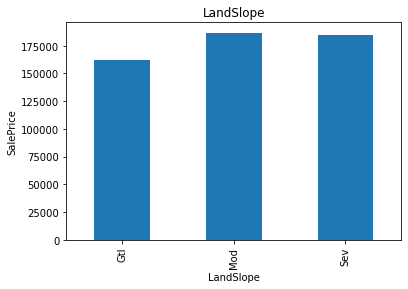

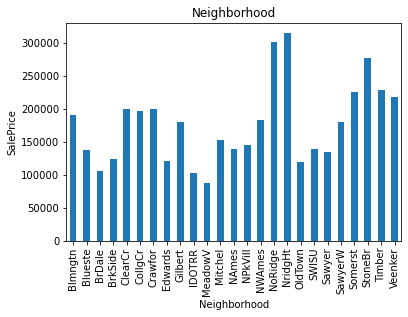

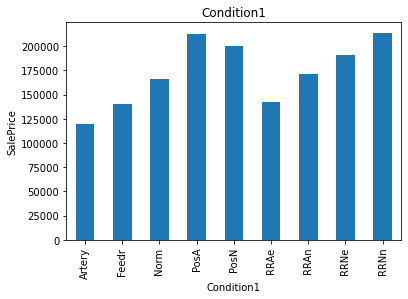

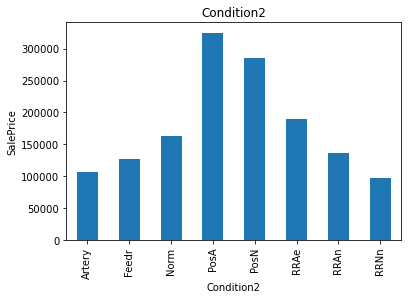

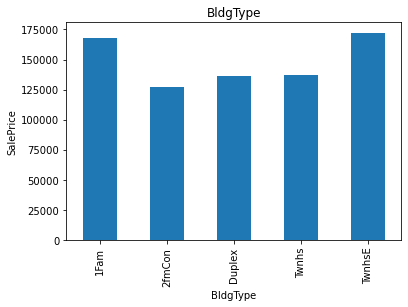

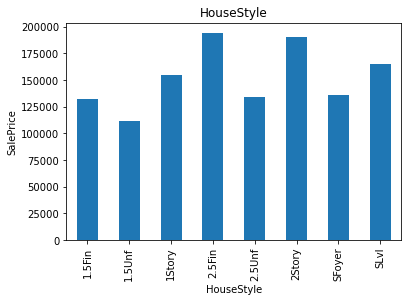

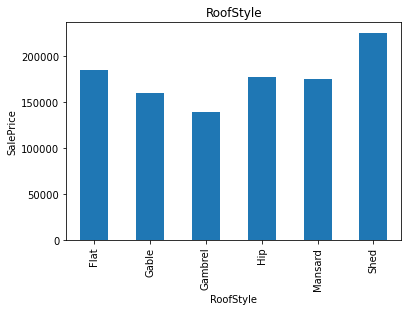

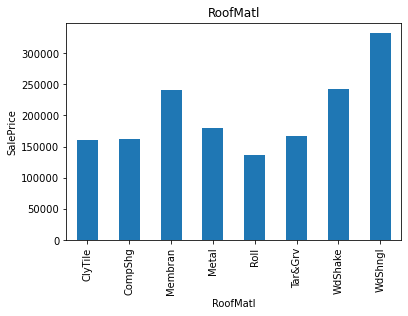

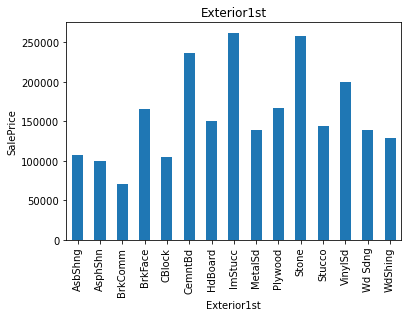

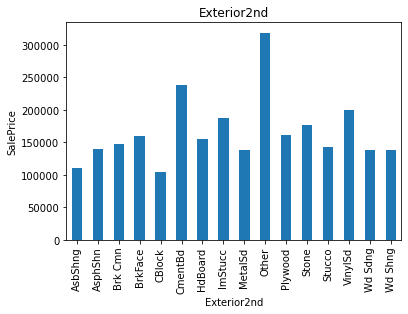

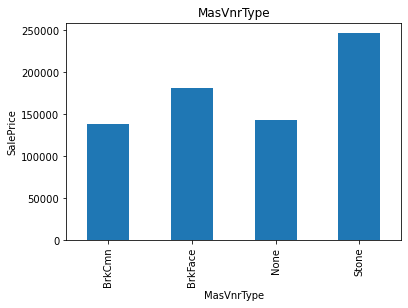

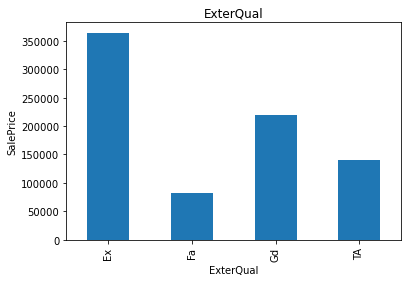

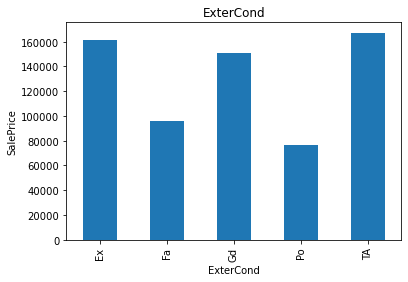

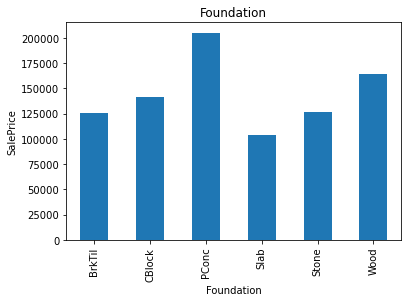

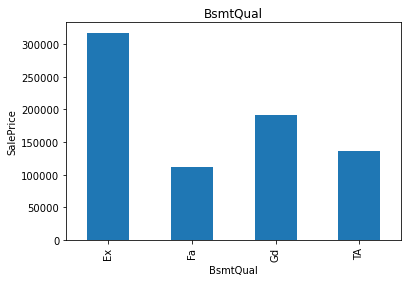

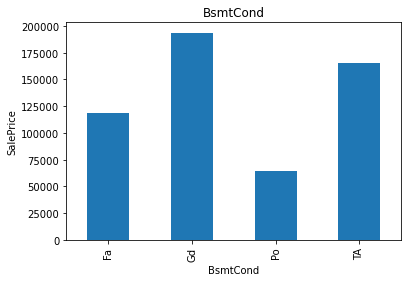

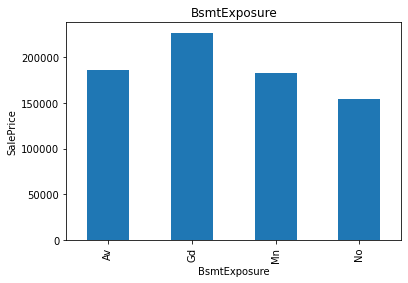

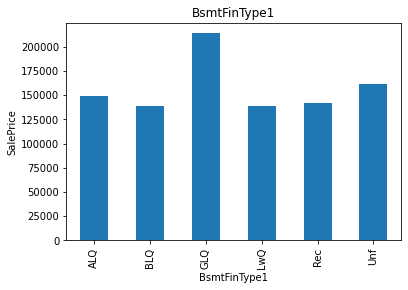

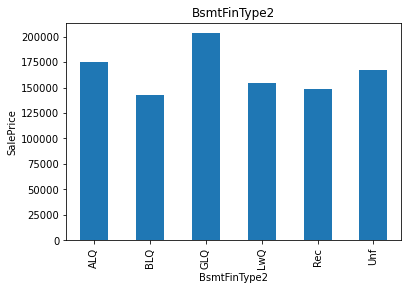

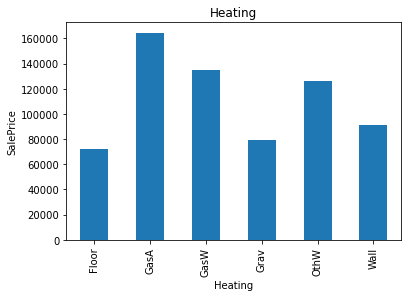

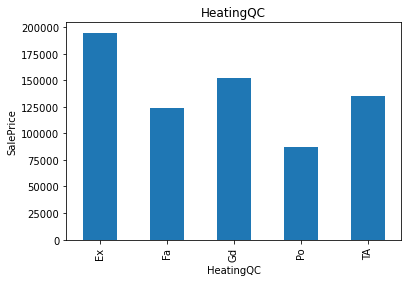

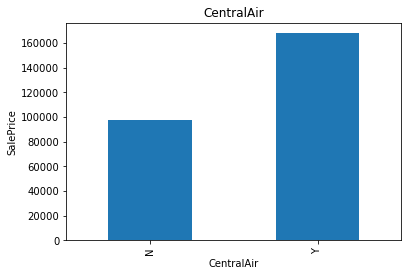

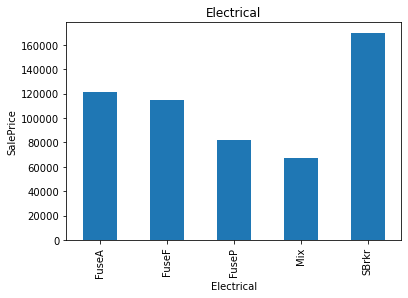

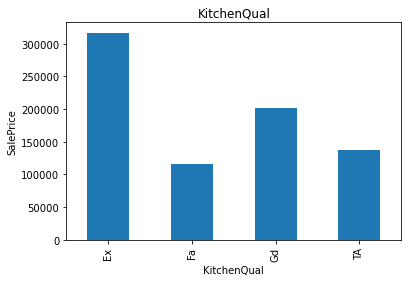

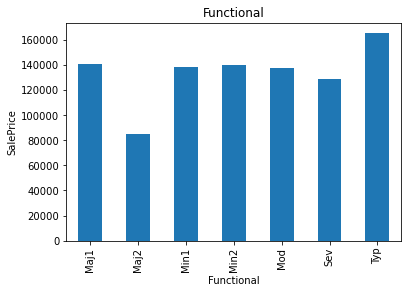

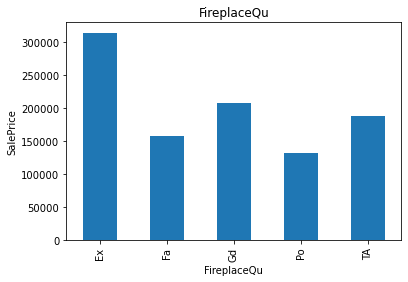

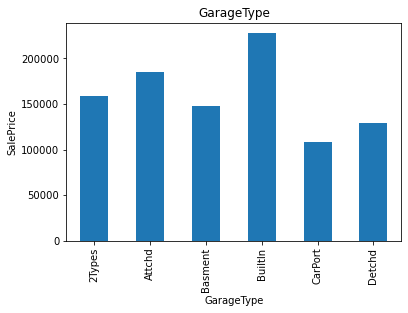

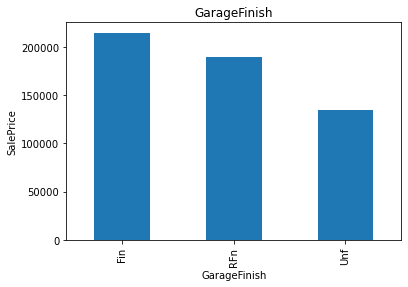

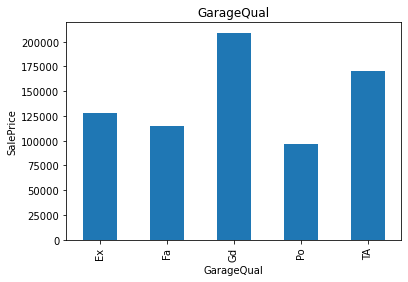

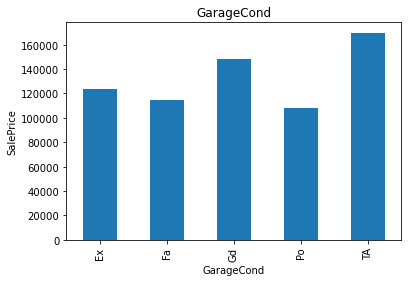

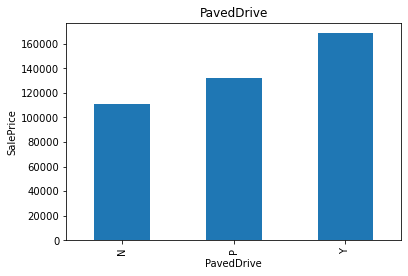

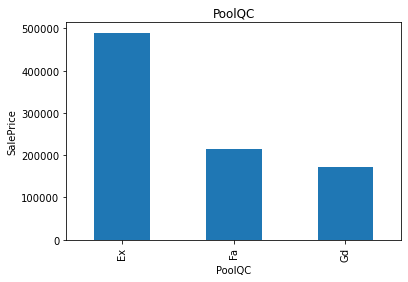

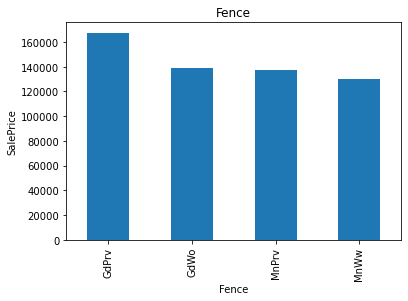

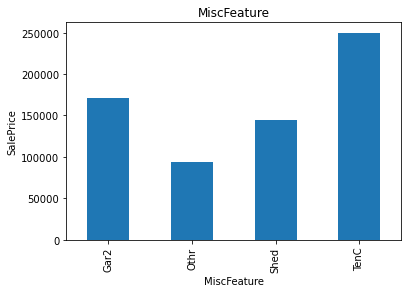

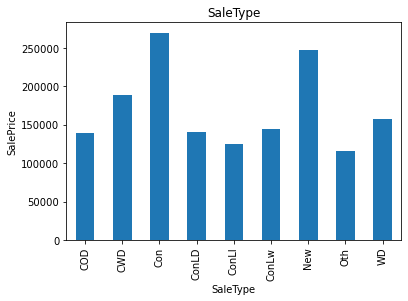

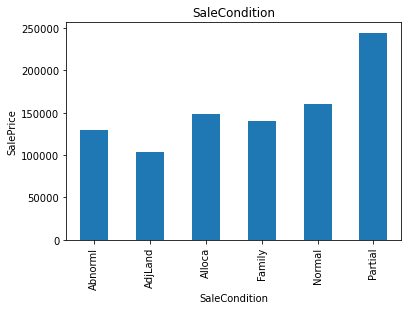

In [24]:
for i in categorical_variables:
    data=dataset.copy()
    data.groupby(i)['SalePrice'].median().plot.bar()
    plt.title(i)
    plt.xlabel(i)
    plt.ylabel('SalePrice')
    plt.show()

From these Analysis we have to do some modifications on Categorical Variables in Feature Engineering